## Projeto de extração e análise de dados de Fundos de Investimentos Brasileiros 
[github](https://github.com/joao-aguilera-c) [linkedin](https://www.linkedin.com/in/joao-aguilera/) 

### 1. [Introdução e ETL (Extract, Transform, Load)](https://nbviewer.jupyter.org/github/joao-aguilera-c/ANALISE-FUNDOS-DE-INVESTIMENTOS/blob/main/ETL%20de%20dados%20de%20Fundos%20de%20Investimentos%20Brasileiros.ipynb)


### 2. Análise Exploratória dos Dados - A industria dos FI Brasileiros

#### Após a primeira etapa do projeto, onde extraí os dados nescessários para o estudo, chegou o momento de analisar  o mercado de fundos de investimentos brasileiros!

Antes de gerar qualquer gráfico é importante conhecermos os dados que manipularemos:



In [1]:
import pandas as pd
import numpy as np

# Abrindo Arquivo de informação
info_df = pd.read_csv('unique_fi_info.csv', encoding='utf-8')

# Convertendo strings para datas
info_df = info_df.replace('-', np.nan)
info_df['dataConstituicao'] =info_df['dataConstituicao'].apply(pd.to_datetime)
info_df['dataCancelamento'] =info_df['dataCancelamento'].apply(pd.to_datetime)

info_df

,CNPJ_FUNDO,nome,nomeAbreviado,dataConstituicao,dataCancelamento,situacao,classe,investidorQualificado,textoTaxaPerformance,nomeAdministrador,nomeGestor,idade
0,00.017.024/0001-53,FUNDO DE INVESTIMENTO RENDA FIXA EXPONENCIAL,FI RF EXPONENCIAL,1994-06-22,NaT,EM FUNCIONAMENTO NORMAL,Fundo de Renda Fixa,False,NaN,NaN,NaN,10.0
1,00.068.305/0001-35,FUNDO DE INVESTIMENTO EM COTAS DE FUNDOS DE IN...,FIC FI CAIXA EMPREENDER RF LP,1994-05-26,NaT,EM FUNCIONAMENTO NORMAL,FIC FI,False,NaN,NaN,NaN,10.0
2,00.071.477/0001-68,BB RENDA FIXA CURTO PRAZO AUTOMÁTICO EMPRESA F...,BB RF CURTO PRAZO AUTOMÁTICO EMPRESA FIC FI,1994-05-19,NaT,EM FUNCIONAMENTO NORMAL,Fundo de Renda Fixa,False,0.0,BB GESTAO DE RECURSOS DTVM S.A,BB GESTAO DE RECURSOS DTVM S.A,27.0
3,00.073.041/0001-08,BB BESC RENDA FIXA PRÁTICO CRÉDITO PRIVADO FUN...,BB BESC RF PRÁTICO CP FI,1995-09-19,NaT,EM FUNCIONAMENTO NORMAL,Fundo de Renda Fixa,False,NaN,NaN,NaN,9.0
4,00.083.181/0001-67,OPP I FUNDO DE INVESTIMENTO EM AÇÕES BDR NÍVEL...,OPP I FIA BDR NÍVEL I IE,1994-03-21,NaT,EM FUNCIONAMENTO NORMAL,Fundo de Ações,False,0.0,BNY MELLON SERVICOS FINANCEIROS DTVM S.A.,OPPORTUNITY HDF ADMINISTRADORA DE RECURSOS LTDA.,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
39432,06.375.286/0001-76,FUNDO DE APLICAÇÃO EM QUOTAS DE FUNDOS DE INVE...,FUNDO DE APLICAÇÃO EM QUOTAS DE FI PRAT 11,2004-07-12,2005-01-14,CANCELADA,FIC FI,False,NaN,NaN,NaN,0.0
39433,06.936.211/0001-17,ARPEX AÇÕES FITVM,ARPEX AÇÕES FITVM,2004-07-09,2005-01-27,CANCELADA,Fundo de Ações,False,NaN,NaN,NaN,0.0
39434,07.064.894/0001-22,FUNDO DE INVESTIMENTO CURTO PRAZO PACTUAL II,FI CURTO PRAZO PACTUAL II,2004-12-30,2005-01-14,CANCELADA,Fundo de Curto Prazo,False,NaN,NaN,NaN,0.0
39435,07.064.961/0001-09,FUNDO DE INVESTIMENTO CURTO PRAZO PACTUAL I,FI CURTO PRAZO PACTUAL I,2004-12-30,2005-01-14,CANCELADA,Fundo de Curto Prazo,False,NaN,NaN,NaN,0.0


Ao examinar os dados percebo que será interessante sabermos qual a idade dos fundos abertos e cancelados. Nas proximas linhas de código crio uma função para calcular a idade dos fundos e adiciono esses valores a uma nova coluna chamada **'idade'**:

In [2]:
from datetime import datetime


# Sort por ordem de constituição 
info_df.sort_values(by=['dataConstituicao'], inplace=True, ascending=True)
info_df = info_df.reset_index()

def getDuration(then, now):
    """Função para definição da idade do fundo"""     

    duration = now - then 
    duration_in_s = duration.total_seconds() 
    
    def years():
      return divmod(duration_in_s, 31536000) # Seconds in a year=31536000.

    return int(years()[0])

# Usando check for nan ára descobrir fundos abertos, ou com missing data
check_for_nan_canc = info_df['dataCancelamento'].isnull()
check_for_nan_const = info_df['dataConstituicao'].isnull()

# Criando coluna 'idade'
i = 0
for index, row in info_df.iterrows():
    if not check_for_nan_const.at[index]:
        if not check_for_nan_canc.at[index]:
            info_df.at[index, 'idade'] = getDuration(
                                            then=info_df.at[index, 'dataConstituicao'],
                                            now=info_df.at[index, 'dataCancelamento']
                                         )
        else:
            info_df.at[index, 'idade'] = getDuration(
                                    then=info_df.at[index, 'dataConstituicao'],
                                    now=datetime.now()
                                 )

    i+=1

Para termos uma visão geral do mercado de fundos, utilizarei a livraria [**SweetViz**](https://pypi.org/project/sweetviz/). Ele organiza os dados e gera gráficos interativos, relacionando as diferentes colunas das nossas dabelas. A seguir eu preparo nossa tabela para o SweetViz. A inteção é comparar os fundos em funcionamento com os fundos cancelados!

In [3]:
# Preparando dados para análise no Sweetviz
analysis_df = info_df.drop(info_df.columns.difference(['situacao', 'classe', 'investidorQualificado', 'idade', 'nomeAdministrador', 'nomeGestor']), 1)

analysis_df.dropna(subset = ["idade"], inplace=True)

abertos = analysis_df.loc[analysis_df['situacao'] == 'EM FUNCIONAMENTO NORMAL']
cancelados = analysis_df.loc[analysis_df['situacao'] == 'CANCELADA']

Agora podemos gerar nosso primeiro **relatório**. 

Ele é **interativo**, então sintam-se a vontade para clicarem nas diferentes seções e obterem uma análise mais completa:

                                             |                                             | [  0%]   00:00 ->…


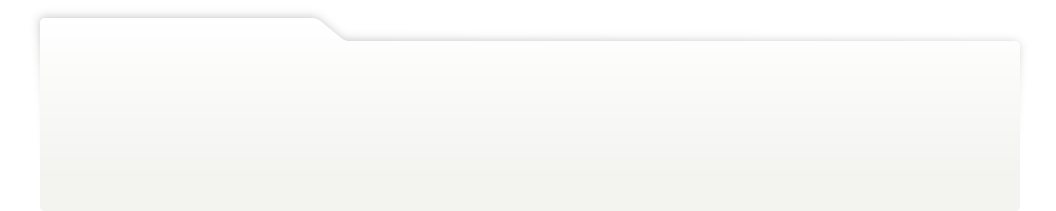
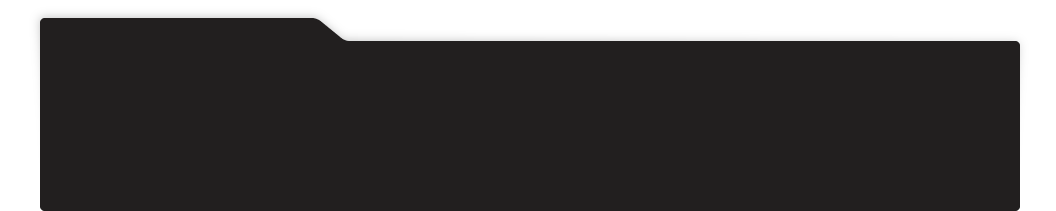
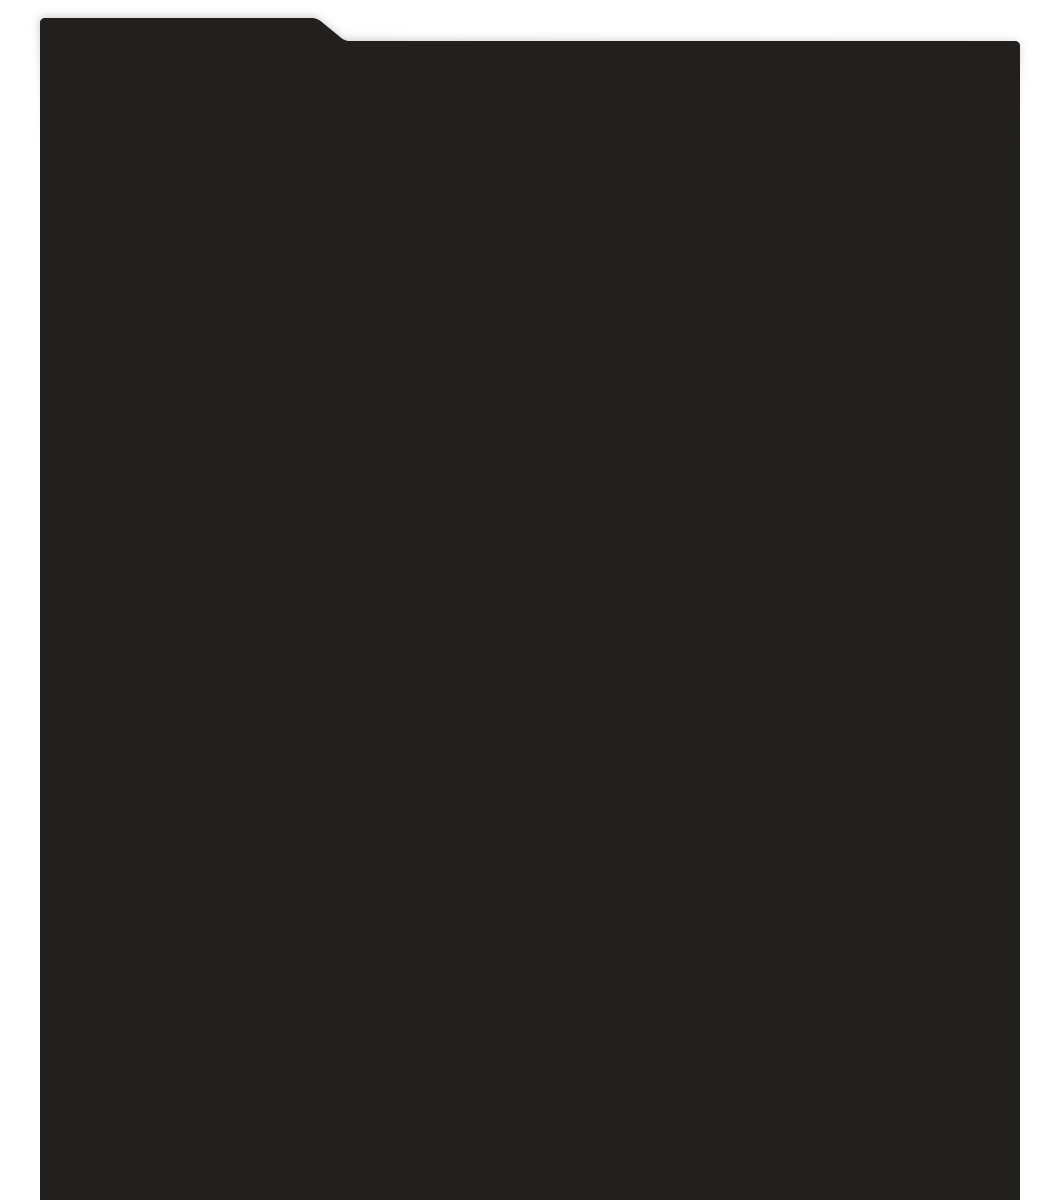
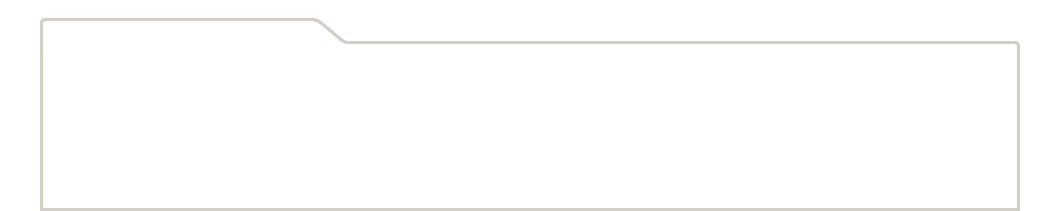
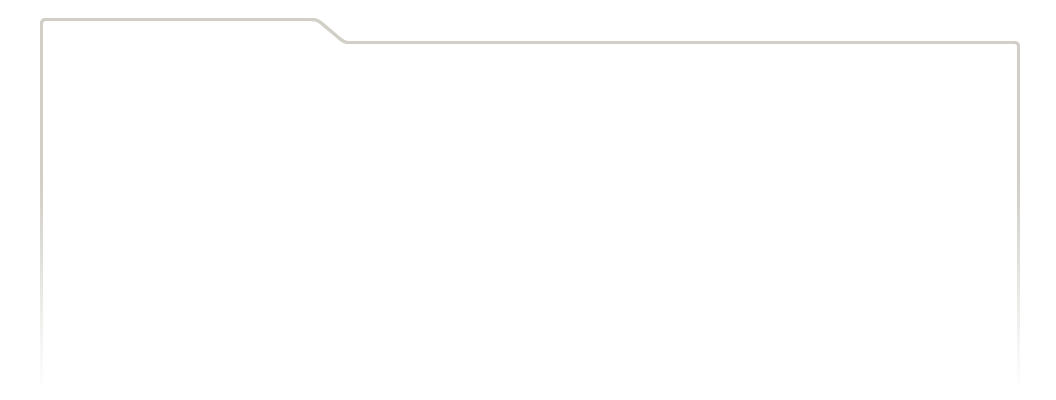
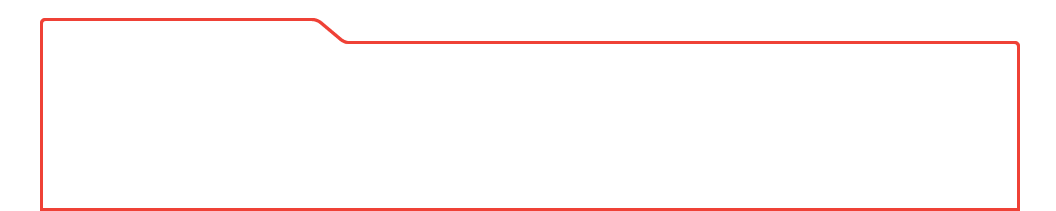
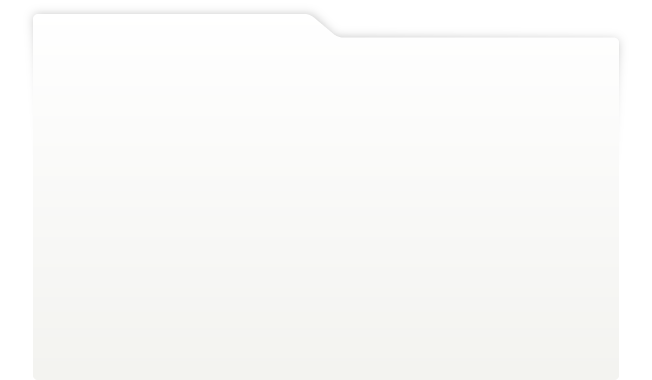
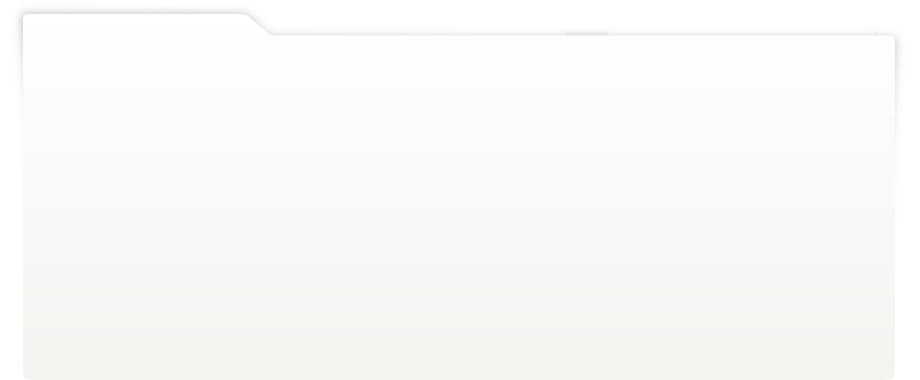
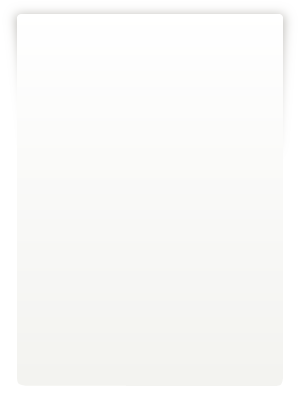
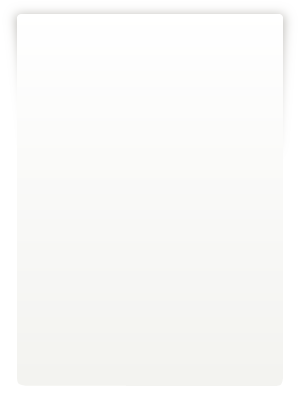
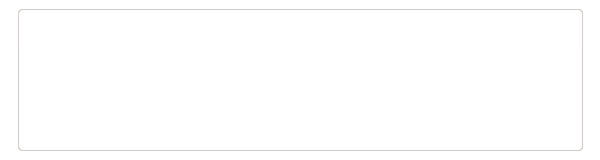
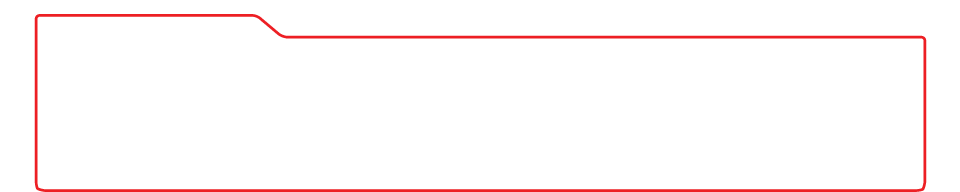
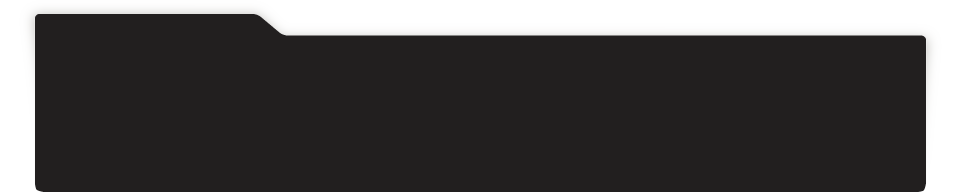
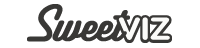
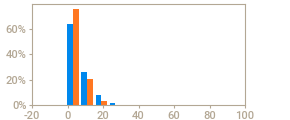
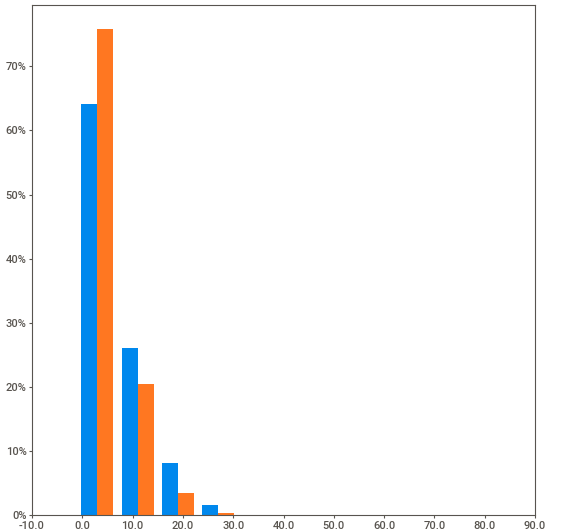
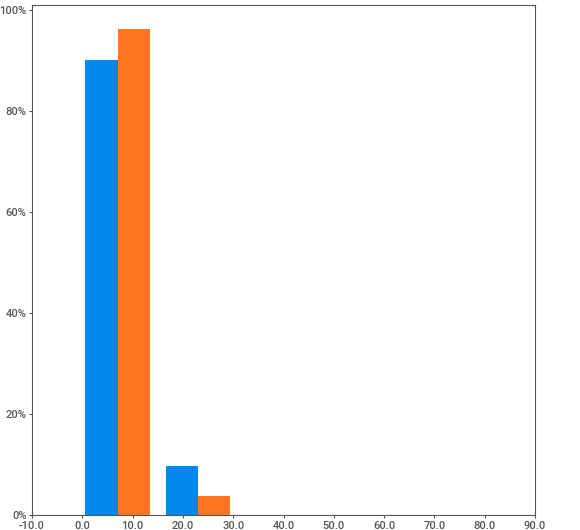
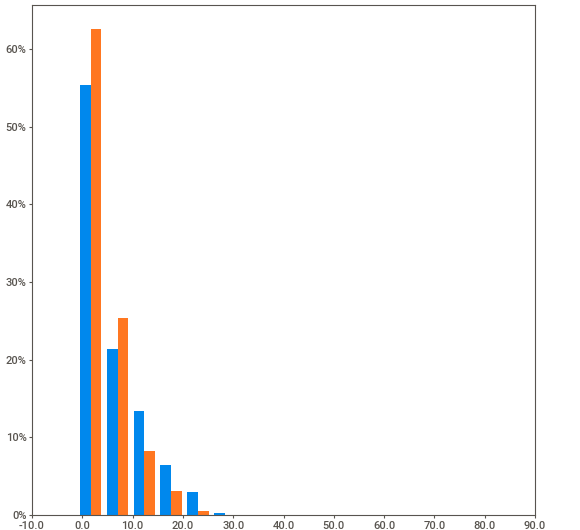
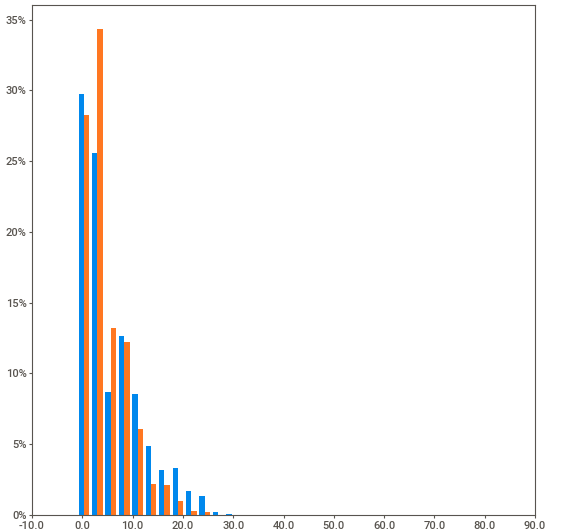
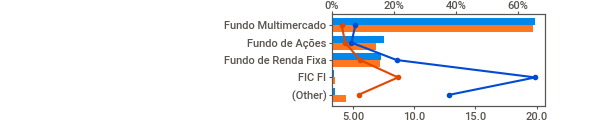
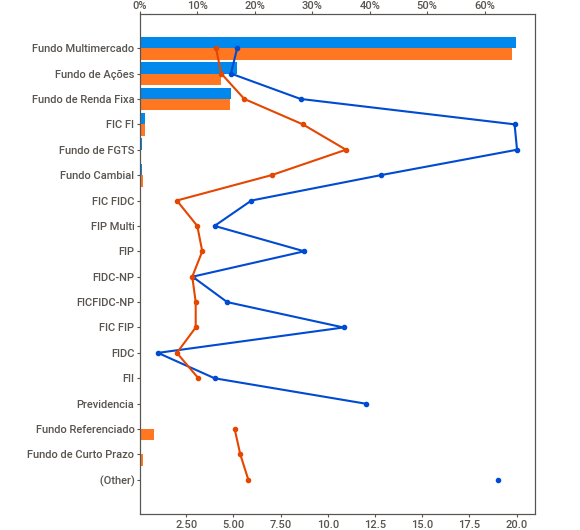
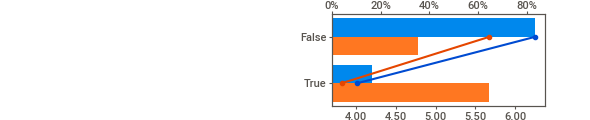
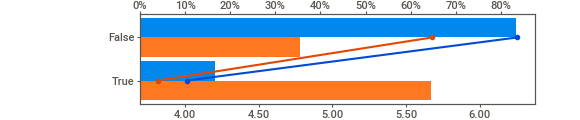
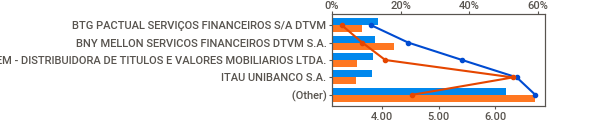
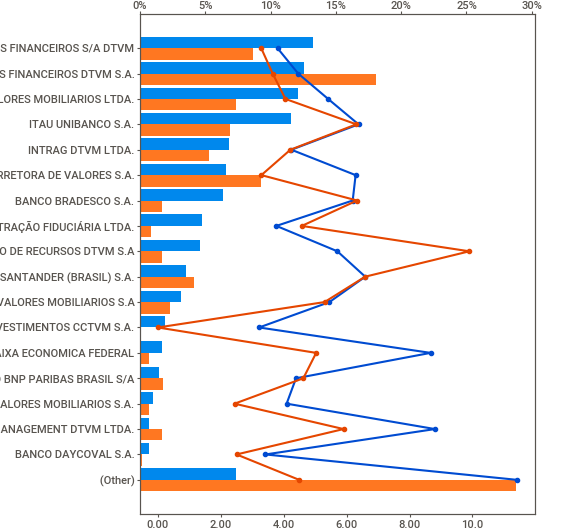
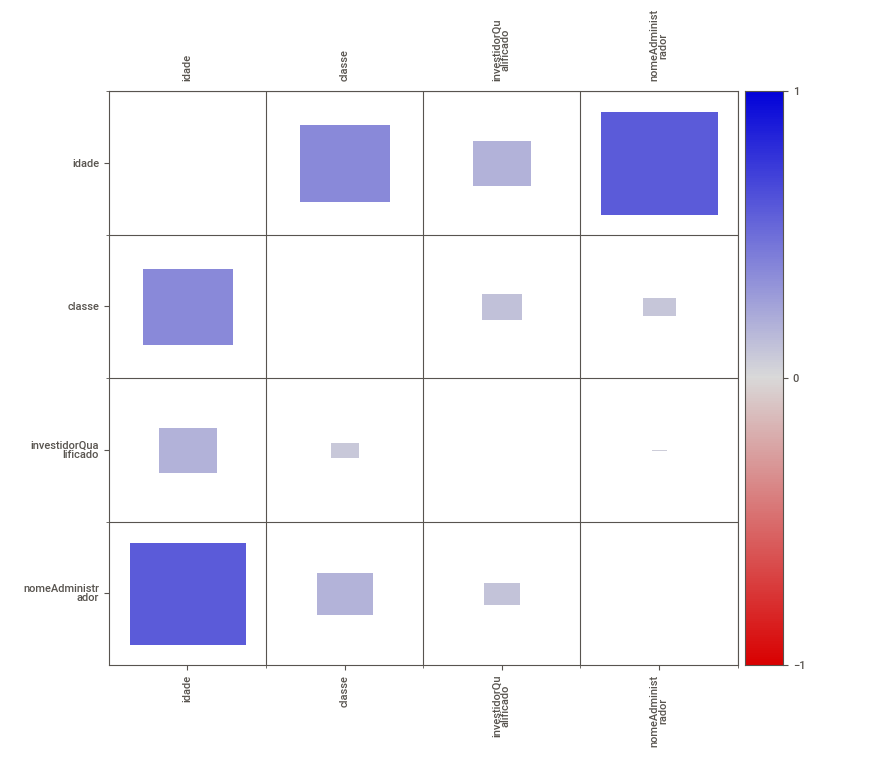
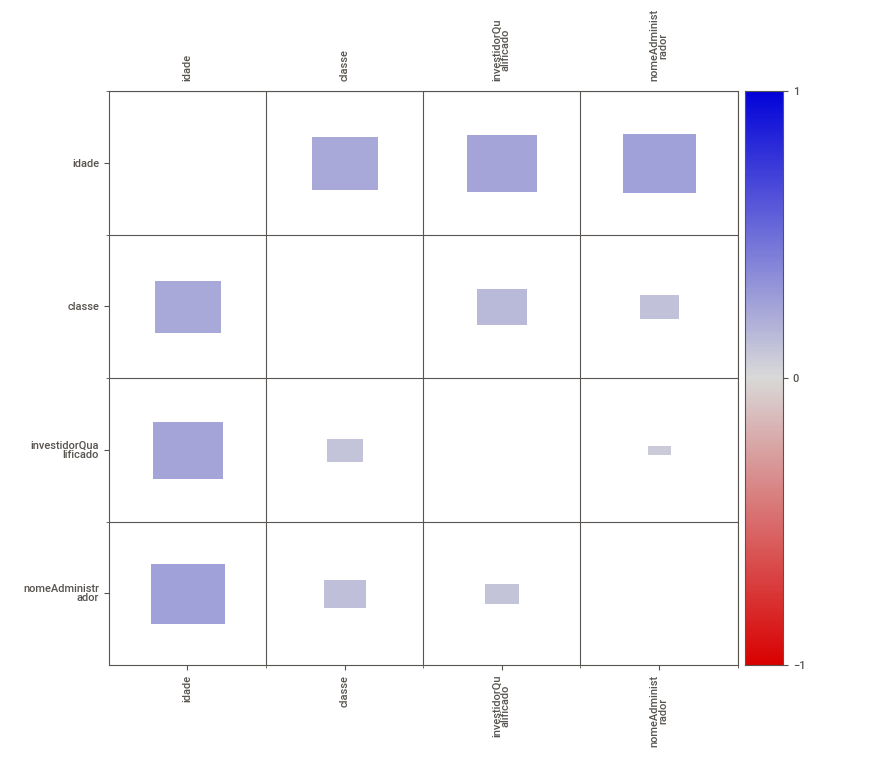

In [4]:
import sweetviz as sv

# Criando report, mas ignorando a coluna situação, pois o report compara justamente as diferentes situações dos fundos.
feature_config = sv.FeatureConfig(skip="situacao")

my_report = sv.compare([abertos, 'Em Funcionamento'], [cancelados, 'Cancelados'], feat_cfg=feature_config, target_feat='idade')

my_report.show_notebook(scale=0.9)

#### Insights:

###### Idade:
- 75% dos fundos cancelados o foram no seu 5º ano de atividade.


- Dos fundos em funcionamento, 75% tem menos de 8 anos.


- A partir do 8 ano de idade existem mais fundos em funcionamento do que cancelados.

###### Classe:
- 60% dos fundos, cancelados ou em atividade, são fundos multimercado.


- Fundos de ações e renda fixa compõe a maior parte dos fundos restantes.


- Fundos de renda fixa duram em média 7.3 anos, enquanto ações e multimercado duram respectivamente 4.6 e 4.8 anos.


###### Investidor Qualificado:
- Fundos para o investidor qualificado foram mais cancelados do que os demais. 
    1. Talvez por que tomem mais risco, já que seus investidorem deveriam ter maior conhecimento em *risk management*.
    2. Outra tese é a de que fundos exclusivos para investidores qualificados estejam perdendo popularidade.



###### Gestão e Administração:

- O maior administrador de fundos é o BTG, porém os fundos Itaú tem em média uma duração mais longa em atividade. BNY Mellon possui mais fundos cancelados que ativos em sua história.


- Bradesco e Itaú gestam quase 15% de todos os fundos ativos, mas apenas 8% dos fundos cancelados.

A segunda livraria que usaremos é a [**Matplotlib**](https://matplotlib.org/). Esta livraria é uma das mais populares e versáteis quando falamos em *data visualization* no **python**.

O primeiro gráfico que gerarei é um histograma de **consituição de fundos vs. ano**:

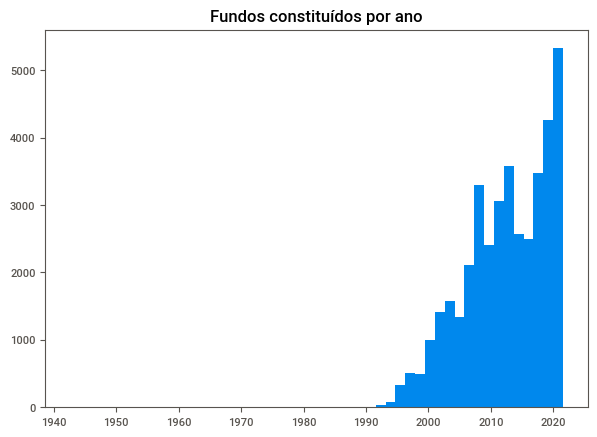

In [5]:
import matplotlib.pyplot as plt

# histograma de criação de fundos por tempo:
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

x = info_df['dataConstituicao']
plt.hist(x, bins=50)
plt.gca().set(title='Fundos constituídos por ano');

#### Insights:

- Crescimento exponencial na quantidade de fundos criados por ano, a partir da decada de 90.


- Em momentos de instabilidade economica ou politica, como na crise de 2008, eleições ou impeachment, houveram quedas consideráveis no numero de fundos criados.


- A pandemia parece não afetar o ritmo de criação dos FI

Para finalizar plotei também o gráfico com a variação da quantidade de fundos em atividade ao longo do tempo:

In [6]:
# Criar tabela de acumulado de constituições
constituicoes = pd.DataFrame()
constituicoes['data'] = info_df['dataConstituicao'].dropna()
constituicoes['data'] = pd.to_datetime(constituicoes['data'])
constituicoes.sort_values(by=['data'], inplace=True, ascending=True)
constituicoes = constituicoes.reset_index()
constituicoes['acumuladoConstituicao'] = constituicoes['data'].index


# Criar tabela para tratar as datas de cancelamento
cancelamento = pd.read_csv('unique_fi_info.csv', encoding='utf-8')

# Convertendo Datas
cancelamento = cancelamento.replace('-', np.nan)
cancelamento['dataCancelamento'] =cancelamento['dataCancelamento'].apply(pd.to_datetime)


# Sort por ordem de constituição 
cancelamento.sort_values(by=['dataCancelamento'], inplace=True, ascending=True)

cancelamento = cancelamento.reset_index()


# Criar tabela de acumulado de cancelamentos

cancelamentos = pd.DataFrame()
cancelamentos['data'] = cancelamento['dataCancelamento'].dropna()
cancelamentos = cancelamentos.reset_index(drop=True)


cancelamentos['acumuladoCancelamento'] = cancelamentos['data'].index


# Criar tabela com data, acumulado de constituições, acumulado de cancelamentos, e diferença entre os dois(fundos em funcionamento)
fundos_funcionamento = pd.merge(constituicoes,cancelamentos,on='data',how='outer',indicator=True)
fundos_funcionamento.at[0, 'acumuladoCancelamento'] = 0
fundos_funcionamento.sort_values(by=['data'], inplace=True, ascending=True)
fundos_funcionamento = fundos_funcionamento.reset_index()

for index, row in fundos_funcionamento.iterrows():
    
    if pd.isnull(fundos_funcionamento['acumuladoConstituicao'][index]):
        fundos_funcionamento.at[index, 'acumuladoConstituicao'] = fundos_funcionamento.at[index-1, 'acumuladoConstituicao']
        
    if pd.isnull(fundos_funcionamento['acumuladoCancelamento'][index]):
        fundos_funcionamento.at[index, 'acumuladoCancelamento'] = fundos_funcionamento.at[index-1, 'acumuladoCancelamento']



fundos_funcionamento['fundosEmFuncionamento'] = fundos_funcionamento['acumuladoConstituicao'] - fundos_funcionamento['acumuladoCancelamento']

fundos_funcionamento.drop_duplicates(subset='data', keep='last', inplace=True)

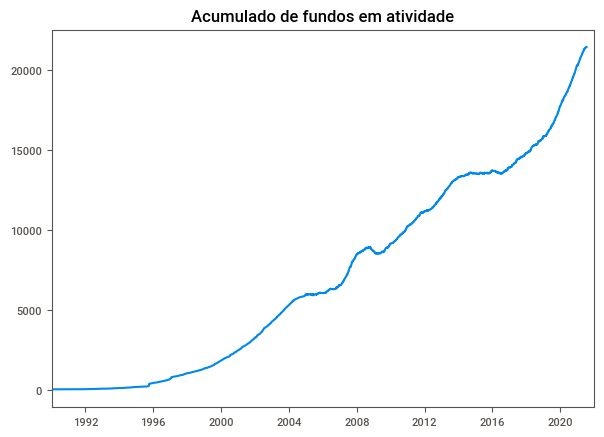

In [7]:
# Finalmente criando plot com fundos em atividade ao longo do tempo
import datetime as dt


date = fundos_funcionamento['data']
func = fundos_funcionamento['fundosEmFuncionamento']  

plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

plt.plot(date, func)


left = dt.date(1990,1,1)
right = dt.date(2021,12,30)

plt.gca().set_xbound(left, right)
plt.gca().set(title='Acumulado de fundos em atividade');

#### Insights:

- Pequeno declinio em 2008, por conta da crise global, e estagnação entre 2013 e 2018, provavelmente pelo processo de impeachment ocorrido no Brasil.


- Crescimento exponencial na quantidade de fundos em atividade. Indicativo de bolha ou aumento da demanda por esse tipo de instrumento?

### Separando o joio do trigo: 20 mil opções de investimento, criadas majoritariamente nos ultimos 5 anos, num mercado altamente aquecido. Como fazer a melhor escolha?


###### Agora que conhecemos um pouco melhor a industria de fundos de investimentos no Brasil sabemos que a maioria dos FI disponíveis têm 5 anos de atividade ou menos. Além disso, a ampla maioria dos fundos que já existiram no brasil foram cancelados antes dos 10 anos de idade. 

###### Se quisermos diminuir os riscos de se investir em um FI no Brasil precisamos de alguma forma comparar as nossas opções. 

###### Portanto na proxima etapa deste estudo realizarei a análise de desempenho de cada fundo, buscarei KPIs que melhor os ranqueiem e tentarei entender as razões por detrás do ciclo de vida tão curto dos fundos brasileiros.

###### Até Já!
